# **Disease Detection**

in this notebook, we are going to work with a dataset of 4 types of X-Ray images:


*   Normal
*   Pneumonia
*   Covid19
*   Turberculosis



The goal is to detect the disease based on the symptoms from the X-Ray images

# Importing libraries

In [ ]:
from zipfile import ZipFile

In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

from matplotlib.image import imread
import os, random
from shutil import copyfile,move

In [ ]:
#reset
#delete all data from all folders
'''import os, shutil
fold = ['./diseases2','./diseases1','./archive(2)','./all_data','./COVID-chestxray-dataset','./images']
for folder in fold:
  for filename in os.listdir(folder):
      file_path = os.path.join(folder, filename)
      try:
          if os.path.isfile(file_path) or os.path.islink(file_path):
              os.unlink(file_path)
          elif os.path.isdir(file_path):
              shutil.rmtree(file_path)
      except Exception as e:
          print('Failed to delete %s. Reason: %s' % (file_path, e))
for folder in fold:
  os.rmdir(folder)'''

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6949751275744336537
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11320098816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5915505349813678180
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]

### Connecting Google Colab with Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Extracting files

In [ ]:
"""with ZipFile('drive/MyDrive/diseases1.zip', 'r') as zipObj:
  zipObj.extractall('diseases1')"""
with ZipFile('drive/MyDrive/ProjetSe2/Datasets/diseases1.zip', 'r') as zipObj:
  zipObj.extractall('diseases1')

In [ ]:
"""with ZipFile('drive/MyDrive/diseases2.zip', 'r') as zipObj:
  zipObj.extractall('diseases2')"""
with ZipFile('drive/MyDrive/ProjetSe2/Datasets/diseases2.zip', 'r') as zipObj:
  zipObj.extractall('diseases2')

In [ ]:
"""with ZipFile('drive/MyDrive/archive (2).zip', 'r') as zipObj:
  zipObj.extractall('archive(2)')"""
with ZipFile('drive/MyDrive/ProjetSe2/Datasets/archive (2).zip', 'r') as zipObj:
  zipObj.extractall('archive(2)')

In [ ]:
"""with ZipFile('drive/MyDrive/Figure1-COVID-chestxray-dataset-master.zip', 'r') as zipObj:
  zipObj.extractall('COVID-chestxray-dataset')"""
with ZipFile('drive/MyDrive/ProjetSe2/Datasets/Figure1-COVID-chestxray-dataset-master.zip', 'r') as zipObj:
  zipObj.extractall('COVID-chestxray-dataset')

In [ ]:
"""with ZipFile('drive/MyDrive/images.zip', 'r') as zipObj:
  zipObj.extractall('images')"""
with ZipFile('drive/MyDrive/ProjetSe2/Datasets/images.zip', 'r') as zipObj:
  zipObj.extractall('images')

# Load The image

In [ ]:
# Define the training and validation base directories
train_dir = './diseases2/train'
validation_dir = './diseases2/test'

In [ ]:
try:
  os.mkdir('all_data')
  os.mkdir('all_data/COVID19')
  os.mkdir('all_data/NORMAL')
  os.mkdir('all_data/PNEUMONIA')
  os.mkdir('all_data/TUBERCULOSIS')
except:
  print('folders already exist')
  pass


In [ ]:
#copy covid19 from diseases2
diseases2_covid19_test_train=['./diseases2/test/COVID19','./diseases2/train/COVID19']
for a in diseases2_covid19_test_train:
  for path in os.listdir(a):
    copyfile(a+ '/' + path,'./all_data/COVID19/' + path)

#copy Normal from diseases2
diseases2_NORMAL_test_train=['./diseases2/test/NORMAL','./diseases2/train/NORMAL']
for a in diseases2_NORMAL_test_train:
  for path in os.listdir(a):
    copyfile(a+ '/' + path,'./all_data/NORMAL/' + path)

#copy Pneumonia from diseases2
diseases2_PNEUMONIA_test_train=['./diseases2/test/PNEUMONIA','./diseases2/train/PNEUMONIA']
for a in diseases2_PNEUMONIA_test_train:
  for path in os.listdir(a):
    copyfile(a+ '/' + path,'./all_data/PNEUMONIA/' + path)

#copy tuberculosis from diseases2
diseases2_TURBERCULOSIS_test_train=['./diseases2/test/TURBERCULOSIS','./diseases2/train/TURBERCULOSIS']
for a in diseases2_TURBERCULOSIS_test_train:
  for path in os.listdir(a):
    copyfile(a+ '/' + path,'./all_data/TUBERCULOSIS/' + path)

In [ ]:
#copy covid19 from diseases1
diseases1_covid19_test_train = './diseases1/COVID-19_Radiography_Dataset/COVID/images'
for path in os.listdir(diseases1_covid19_test_train):
  copyfile(diseases1_covid19_test_train + '/' + path,'./all_data/COVID19/' + path)

#copy normal from diseases1
diseases1_NORMAL_test_train = './diseases1/COVID-19_Radiography_Dataset/Normal/images'
for path in os.listdir(diseases1_NORMAL_test_train):
  copyfile(diseases1_NORMAL_test_train + '/' + path,'./all_data/NORMAL/' + path)

#copy pneumonia from diseases1  
diseases1_Pneumonia_test_train = './diseases1/COVID-19_Radiography_Dataset/Viral Pneumonia/images'
for path in os.listdir(diseases1_Pneumonia_test_train):
  copyfile(diseases1_Pneumonia_test_train + '/' + path,'./all_data/PNEUMONIA/' + path)

In [ ]:
#copy Tuberculosis from archive(2) #(not needed because same data as the other one)
'''archive2_tuberculosis_test_train = './archive(2)/TB_Chest_Radiography_Database/Tuberculosis'
for path in os.listdir(archive2_tuberculosis_test_train):
  copyfile(archive2_tuberculosis_test_train + '/' + path,'./all_data/TUBERCULOSIS/' + path)'''

"archive2_tuberculosis_test_train = './archive(2)/TB_Chest_Radiography_Database/Tuberculosis'\nfor path in os.listdir(archive2_tuberculosis_test_train):\n  copyfile(archive2_tuberculosis_test_train + '/' + path,'./all_data/TUBERCULOSIS/' + path)"

In [ ]:
#copy covid19 from Covid-X-ray dataset
covid_X_ray_test_train = './COVID-chestxray-dataset/Figure1-COVID-chestxray-dataset-master/images' 
for path in os.listdir(covid_X_ray_test_train):
  copyfile(covid_X_ray_test_train + '/' + path,'./all_data/COVID19/' + path)

In [ ]:
tuberculosiss_X_ray_test_train = './images/images' 
for path in os.listdir(tuberculosiss_X_ray_test_train):
  copyfile(tuberculosiss_X_ray_test_train + '/' + path,'./all_data/TUBERCULOSIS/' + path)

In [ ]:
cov19_ = './all_data/COVID19/'
norm_ = './all_data/NORMAL/'
pneumo_ = './all_data/PNEUMONIA/'
tuberc_ = './all_data/TUBERCULOSIS/'
train_base = './all_data/train'
test_base = './all_data/test'

# Data Exploration

In [ ]:
print(f"There are {len(os.listdir(cov19_))} images of covid19\n")
print(f"There are {len(os.listdir(norm_))} images of normal\n")
print(f"There are {len(os.listdir(pneumo_))} images of pneumonia\n")
print(f"There are {len(os.listdir(tuberc_))} images of tuberculosis\n")

There are 4237 images of covid19

There are 11767 images of normal

There are 5610 images of pneumonia

There are 1353 images of tuberculosis



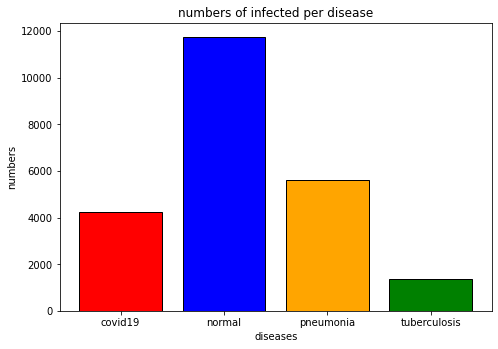

In [ ]:
import matplotlib.pyplot as plt  # Module pour tracer les graphiques
import numpy as np

# Préparation de la figure
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

etiquettes = ['covid19', 'normal', 'pneumonia', 'tuberculosis']
valeurs = [len(os.listdir(cov19_)),len(os.listdir(norm_)),len(os.listdir(pneumo_)),len(os.listdir(tuberc_))]

# Affichage des données
ax.bar(etiquettes, valeurs, color=[
       'red', 'blue', 'orange', 'green'],edgecolor="black")

plt.title("numbers of infected per disease")  # Titre du graphique
plt.ylabel('numbers')  # Titre de l'axe y
plt.xlabel('diseases')
plt.show()  # Affichage d'une courbe

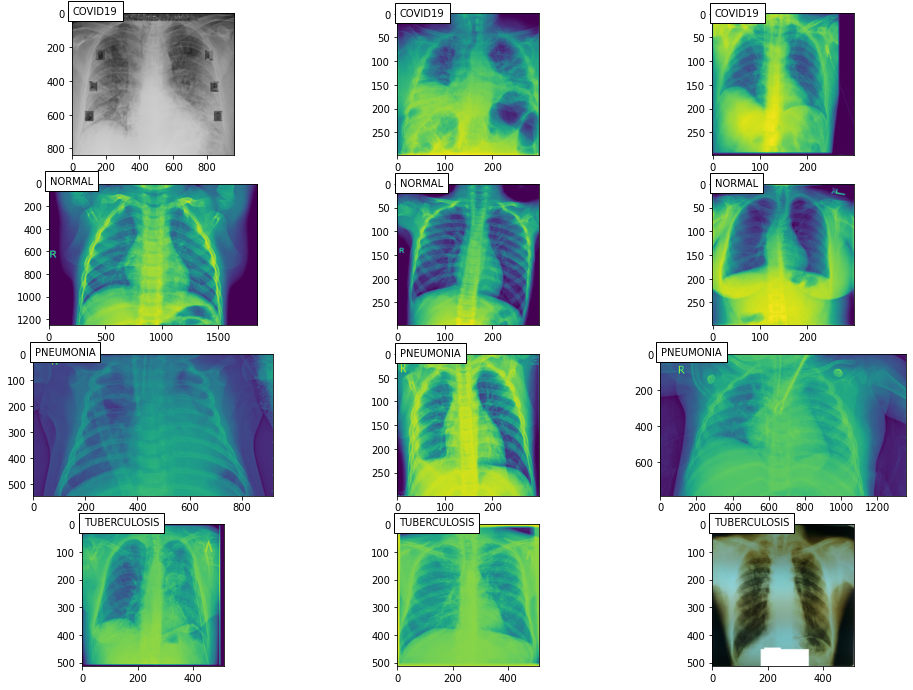

In [ ]:
#Data visualization
folder = [cov19_, norm_, pneumo_, tuberc_]
ls=['COVID19','NORMAL','PNEUMONIA','TUBERCULOSIS']
k=0
fig = plt.gcf()
fig.set_size_inches(4*4, 3*4)
for j in range(len(folder)):
  for i in range(3):
    im=folder[j]+ '/'+random.choice(os.listdir(folder[j]))
    sp = plt.subplot(4, 3, k+ 1)
    sp.axis('On') 
    img = imread(im)
    plt.imshow(img)
    plt.text(5, 5, ls[j], bbox={'facecolor': 'white', 'pad': 5})
    k+=1

plt.show()

## Data Preparation

Remove dublicate images

In [ ]:
from imutils import paths
import cv2
import os
def dhash(image, hashSize=16):  #function that takes an image and returns a hascode corresponding to it. the higher hashSize value is the longer it takes to launch but it becomes more precise
	# convert the image to grayscale and resize the grayscale image,
	# adding a single column (width) so we can compute the horizontal
	# gradient
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	resized = cv2.resize(gray, (hashSize + 1, hashSize))
	# compute the (relative) horizontal gradient between adjacent
	# column pixels
	diff = resized[:, 1:] > resized[:, :-1]
	# convert the difference image to a hash and return it
	return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])
 


In [ ]:
def find_and_dublicates(BaseDir): #function that takes path and finds all dublicate files
  li=[]
  for file in os.listdir(BaseDir):
    li.append(BaseDir+file)
  imagePaths = li
  hashes = {}
  for imagePath in imagePaths:
	  image = cv2.imread(imagePath)
	  h = dhash(image)
	  # grab all image paths with that hash, add the current image
	  # path to it, and store the list back in the hashes dictionary
	  p = hashes.get(h, [])
	  p.append(imagePath)
	  hashes[h] = p
  return hashes #returns a dictionary with unique and dublicate values

In [ ]:
def remove_dublicates(HasmMapDict): #function that removes all dublicates from the hasmMapDict
  for (h, hashedPaths) in HasmMapDict.items():
    if (len(hashedPaths) > 1):
      for p in hashedPaths[1:]:
        os.remove(p)

In [ ]:
h=find_and_dublicates(tuberc_)
print(tuberc_)
print('number of all images: ' + str(len(os.listdir(tuberc_))))
print('number of unique images: ' + str(len(h)))
remove_dublicates(h)

./all_data/TUBERCULOSIS/
number of all images: 1353
number of unique images: 1345


In [ ]:
h=find_and_dublicates(norm_)
print(norm_)
print('number of all images: ' + str(len(os.listdir(norm_))))
print('number of unique images: ' + str(len(h)))
remove_dublicates(h)

./all_data/NORMAL/
number of all images: 11767
number of unique images: 11762


In [ ]:
h=find_and_dublicates(cov19_)
print(cov19_)
print('number of all images: ' + str(len(os.listdir(cov19_))))
print('number of unique images: ' + str(len(h)))
remove_dublicates(h)

./all_data/COVID19/
number of all images: 4237
number of unique images: 4146


In [ ]:
h=find_and_dublicates(pneumo_)
print(pneumo_)
print('number of all images: ' + str(len(os.listdir(pneumo_))))
print('number of unique images: ' + str(len(h)))
remove_dublicates(h)

./all_data/PNEUMONIA/
number of all images: 5610
number of unique images: 5575


Define the training and validation base directories

In [ ]:
try:
  os.mkdir('all_data/train')
  os.mkdir('all_data/test')
  os.mkdir('all_data/FFtest')
  os.mkdir('all_data/train/COVID19')
  os.mkdir('all_data/train/NORMAL')
  os.mkdir('all_data/train/PNEUMONIA')
  os.mkdir('all_data/train/TUBERCULOSIS')
  os.mkdir('all_data/test/COVID19')
  os.mkdir('all_data/test/NORMAL')
  os.mkdir('all_data/test/PNEUMONIA')
  os.mkdir('all_data/test/TUBERCULOSIS')

  os.mkdir('all_data/FFtest/COVID19')
  os.mkdir('all_data/FFtest/NORMAL')
  os.mkdir('all_data/FFtest/PNEUMONIA')
  os.mkdir('all_data/FFtest/TUBERCULOSIS')
except:
  print('folders already exist')
  pass

In [ ]:
print(len(os.listdir(cov19_)))
print(len(os.listdir(norm_)))
print(len(os.listdir(pneumo_)))
print(len(os.listdir(tuberc_)))
tr,tes = 0.8,0.2  # train/validation ratio 80% for trainning and 20% for validation

4146
11762
5575
1345


In [ ]:
from tqdm import tqdm
def move_from_to(FilesLoc, DestName, trainPerc):    #function that distributes images between train and test from FilesLoc with a trainPerc rate
  for i in tqdm(range(int(trainPerc*len(os.listdir(FilesLoc))))):
    TFile = random.choice(os.listdir(FilesLoc))
    ranFile = FilesLoc + '/' + TFile
    move(ranFile, train_base + '/' + DestName + TFile)
  for filee in os.listdir(FilesLoc):
    move(FilesLoc + '/' + filee, test_base + '/' + DestName + filee)
  print(len(os.listdir(test_base + '/' + DestName)) + len(os.listdir(train_base + '/' + DestName)))
move_from_to(cov19_,'COVID19/',tr)
move_from_to(norm_,'NORMAL/',tr)
move_from_to(pneumo_,'PNEUMONIA/',tr)
move_from_to(tuberc_,'TUBERCULOSIS/',tr)

100%|██████████| 3316/3316 [00:04<00:00, 822.54it/s] 


4146


100%|██████████| 9409/9409 [00:31<00:00, 296.82it/s]


11762


100%|██████████| 4460/4460 [00:07<00:00, 583.47it/s] 


5575


100%|██████████| 1076/1076 [00:00<00:00, 2215.01it/s]

1345


In [ ]:
"""
cov19_ = './all_data/train/COVID19/'
norm_ = './all_data/train/NORMAL/'
pneumo_ = './all_data/train/PNEUMONIA/'
tuberc_ = './all_data/train/TUBERCULOSIS/'

FFbaseCov = './all_data/FFtest/COVID19/'
FFbaseCov = './all_data/FFtest/NORMAL/'
FFbaseCov = './all_data/FFtest/PNEUMONIA/'
FFbaseCov = './all_data/FFtest/TUBERCULOSIS/'
"""

In [ ]:
def mvFileFromTo(Frm,ToP,nb):
  count = 0
  while count<nb:
    TFile = random.choice(os.listdir(Frm))
    ranFile = Frm + '/' + TFile
    move(ranFile, ToP + TFile)
    count+=1

mvFileFromTo('./all_data/train/COVID19/','./all_data/FFtest/COVID19/',10)
mvFileFromTo('./all_data/train/NORMAL/','./all_data/FFtest/NORMAL/',10)
mvFileFromTo('./all_data/train/PNEUMONIA/','./all_data/FFtest/PNEUMONIA/',10)
mvFileFromTo('./all_data/train/TUBERCULOSIS/','./all_data/FFtest/TUBERCULOSIS/',10)

In [ ]:
# Define the training and validation base directories
train_dir = './all_data/train'
validation_dir = './all_data/test'

In [ ]:
train_covid_dir = os.path.join(train_dir, 'COVID19')
train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
train_tuberculosis_dir = os.path.join(train_dir, 'TUBERCULOSIS')

validation_covid_dir = os.path.join(validation_dir, 'COVID19')
validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')
validation_tuberculosis_dir = os.path.join(validation_dir, 'TUBERCULOSIS')

# Check the number of images for each class and set
print(f"There are {len(os.listdir(train_covid_dir))} images of covid19 for training.\n")
print(f"There are {len(os.listdir(train_normal_dir))} images of normal for training.\n")
print(f"There are {len(os.listdir(train_pneumonia_dir))} images of pneumonia for training.\n")
print(f"There are {len(os.listdir(train_tuberculosis_dir))} images of tuberculosis for training.\n")
print(f"There are {len(os.listdir(validation_covid_dir))} images of covid19 for validation.\n")
print(f"There are {len(os.listdir(validation_normal_dir))} images of normal for validation.\n")
print(f"There are {len(os.listdir(validation_pneumonia_dir))} images of pneumonia for validation.\n")
print(f"There are {len(os.listdir(validation_tuberculosis_dir))} images of tuberculosis for validation.\n")

There are 3306 images of covid19 for training.

There are 9399 images of normal for training.

There are 4450 images of pneumonia for training.

There are 1066 images of tuberculosis for training.

There are 830 images of covid19 for validation.

There are 2353 images of normal for validation.

There are 1115 images of pneumonia for validation.

There are 269 images of tuberculosis for validation.



## Data Augmentation

In [ ]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(
    rescale = 1./255.
    )

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      target_size=(150, 150),
                                                    color_mode="grayscale",
                                                    batch_size=64,
                                                    class_mode="categorical",
                                                    shuffle=True,seed=42)
  validation_datagen = ImageDataGenerator(
      rescale=1 / 255
      )
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                target_size=(150, 150),
                                                    color_mode="grayscale",
                                                    batch_size=64,
                                                    class_mode="categorical",
                                                    shuffle=True,seed=42)
  return train_generator, validation_generator


In [ ]:
train_generator, validation_generator = train_val_generators(train_dir, validation_dir) #22,828

Found 18221 images belonging to 4 classes.
Found 4567 images belonging to 4 classes.


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# Import packages
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model= Sequential()

model.add(Conv2D(filters=128,strides= 1, kernel_size = (5,5), activation='relu', input_shape=(150,150,1,)))
model.add(MaxPool2D(3,3))
model.add(Conv2D(filters=64,kernel_size = (5,5),activation='relu'))
model.add(MaxPool2D(3,3))

model.add(Conv2D(filters=32,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=32,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 128)     3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        204864    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


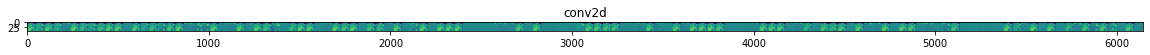

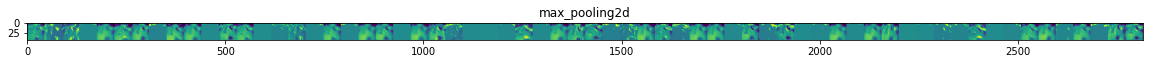

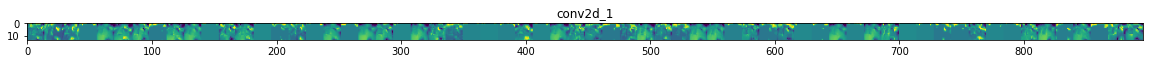

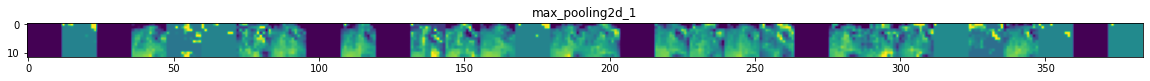

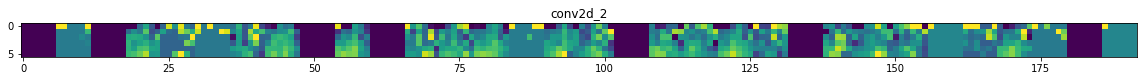

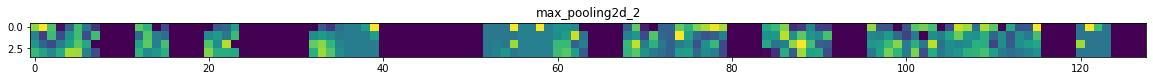

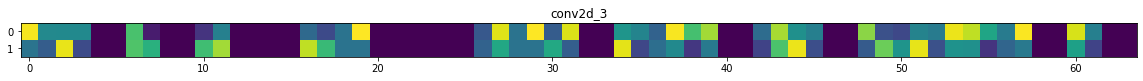

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

covid_img_files = [os.path.join(train_covid_dir, f) for f in os.listdir(train_covid_dir)]

img_path = random.choice(covid_img_files)
img = load_img(img_path, target_size=(150, 150),color_mode="grayscale")  # this is a PIL image

x   = img_to_array(img)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 1)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid


    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

In [ ]:
# Hyperparameters
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size
# Stop the training when there is no improvement after 3 epochs trainings.
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN,
          validation_data=validation_generator,verbose= 1,
          validation_steps=STEP_SIZE_VALID,
          epochs=30, callbacks=early_stop)

Epoch 1/30
284/284 [==============================] - 196s 678ms/step - loss: 0.8373 - accuracy: 0.6587 - val_loss: 0.5734 - val_accuracy: 0.7667
Epoch 2/30
284/284 [==============================] - 193s 681ms/step - loss: 0.4928 - accuracy: 0.8048 - val_loss: 0.4157 - val_accuracy: 0.8371
Epoch 3/30
284/284 [==============================] - 184s 649ms/step - loss: 0.3801 - accuracy: 0.8536 - val_loss: 0.4153 - val_accuracy: 0.8402
Epoch 4/30
284/284 [==============================] - 176s 621ms/step - loss: 0.3113 - accuracy: 0.8803 - val_loss: 0.3194 - val_accuracy: 0.8845
Epoch 5/30
284/284 [==============================] - 175s 614ms/step - loss: 0.2642 - accuracy: 0.9013 - val_loss: 0.2759 - val_accuracy: 0.8979
Epoch 6/30
284/284 [==============================] - 175s 616ms/step - loss: 0.2278 - accuracy: 0.9158 - val_loss: 0.2521 - val_accuracy: 0.9126
Epoch 7/30
284/284 [==============================] - 170s 598ms/step - loss: 0.2086 - accuracy: 0.9214 - val_loss: 0.2924 -

Text(0.5, 1.0, 'Training and validation loss')

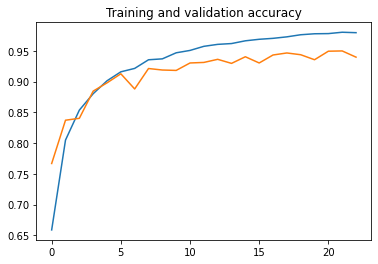

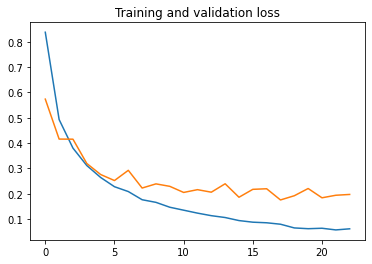

In [ ]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
loss= history.history['loss']
val_loss= history.history['val_loss' ]
epochs= range(len(acc)) 
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs,loss )
plt.plot(epochs,val_loss)
plt.title('Training and validation loss'   )

In [ ]:
pip install visualkeras

     |████████████████████████████████| 992 kB 5.4 MB/s 


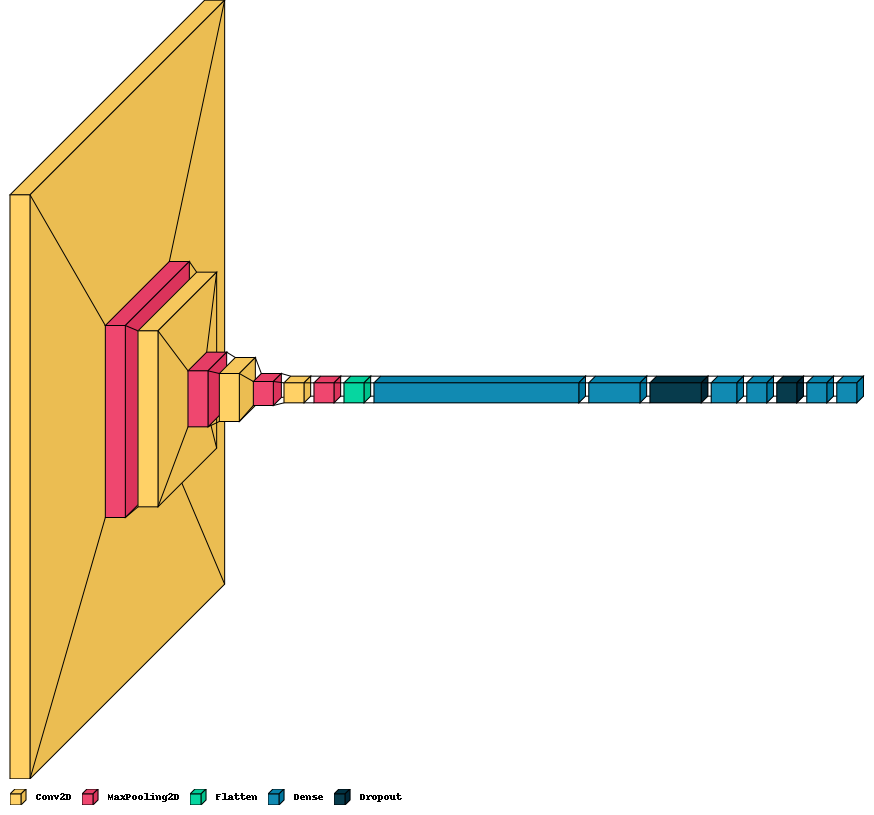

In [ ]:
import visualkeras

visualkeras.layered_view(model, legend=True)  # font is optional!

In [ ]:
model.save("model_fpl2.h5")

In [ ]:
!zip -r /content/all_data/FFtest.zip /content/all_data/FFtest

  adding: content/all_data/FFtest/ (stored 0%)
  adding: content/all_data/FFtest/TUBERCULOSIS/ (stored 0%)
  adding: content/all_data/FFtest/TUBERCULOSIS/Tuberculosis-589.png (deflated 0%)
  adding: content/all_data/FFtest/TUBERCULOSIS/Tuberculosis-140.png (deflated 0%)
  adding: content/all_data/FFtest/TUBERCULOSIS/Tuberculosis-571.png (deflated 2%)
  adding: content/all_data/FFtest/TUBERCULOSIS/CHNCXR_0613_1.png (deflated 0%)
  adding: content/all_data/FFtest/TUBERCULOSIS/Tuberculosis-81.png (deflated 0%)
  adding: content/all_data/FFtest/TUBERCULOSIS/Tuberculosis-545.png (deflated 0%)
  adding: content/all_data/FFtest/TUBERCULOSIS/CHNCXR_0579_1.png (deflated 0%)
  adding: content/all_data/FFtest/TUBERCULOSIS/CHNCXR_0226_0.png (deflated 0%)
  adding: content/all_data/FFtest/TUBERCULOSIS/Tuberculosis-177.png (deflated 0%)
  adding: content/all_data/FFtest/TUBERCULOSIS/Tuberculosis-561.png (deflated 0%)
  adding: content/all_data/FFtest/PNEUMONIA/ (stored 0%)
  adding: content/all_data

In [ ]:
from google.colab import files
files.download('/content/all_data/FFtest.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [ ]:
rgb_weights = [0.2989, 0.5870, 0.1140]
def ProcessImg(img):
  imgGray = np.dot(img[...,:3], rgb_weights)
  img_4d = imgGray.reshape(-1,150,150,1)
  img_4d /= 255.0
  return img_4d

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 128)     3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        204864    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [ ]:
from keras.models import load_model
modelAA = load_model('/content/model_fpl2.h5')
modelAA.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 128)     3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        204864    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [ ]:
from keras.models import load_model
modelAA = load_model('/content/model927.h5')
modelAA.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 17, 17, 64)      

[ 6.643043   -0.39107078 -9.868364    0.9440792 ]
{'covid19': 6.643043041229248, 'normal': -0.39107078313827515, 'pneumonia': -9.868364334106445, 'tuberculosis': 0.9440792202949524}


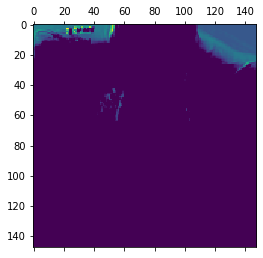

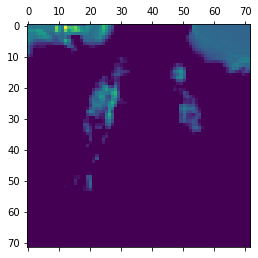

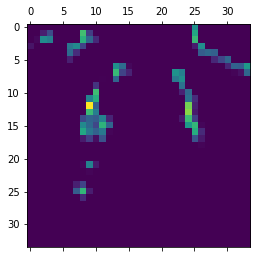

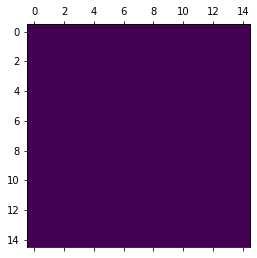

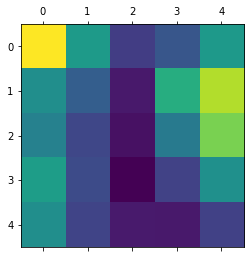

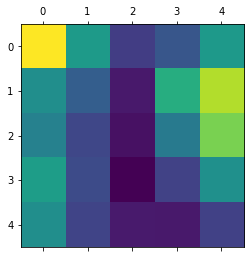

In [ ]:
# Prepare image
img_size = (150, 150)
img_path = "/content/all_data/test/COVID19/COVID-1043.png"  #Image path for the analysed image
img_array = ProcessImg(get_img_array(img_path,size=img_size)) #process image (grayscale+resize+rescale)
last_conv_layer_name = ['conv2d','conv2d_1','conv2d_2', 'conv2d_3'] #list of conv2dLayers
last_conv_layer_names = ['conv2d_10','conv2d_11','conv2d_12', 'conv2d_13','conv2d_14'] #list of conv2dLayers
class_names = ['covid19','normal','pneumonia','tuberculosis']
# Make model
model1 = modelAA

# Remove last layer's softmax
model1.layers[-1].activation = None

# Print what the top predicted class is
#preds = model1.predict(img_array)
prediction=model1.predict(img_array)[0]
dictV = {class_names[i]: float(prediction[i]) for i in range(4)}
print(prediction)
print(dictV)
#print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
for a in last_conv_layer_names:
  heatmap = make_gradcam_heatmap(img_array, model1, a)
  plt.matshow(heatmap)
  plt.show()
# Display heatmap
plt.matshow(heatmap)
plt.show()


In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


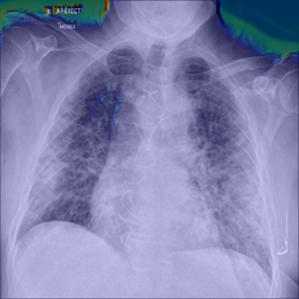

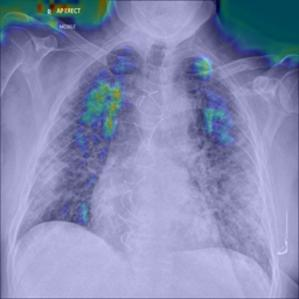

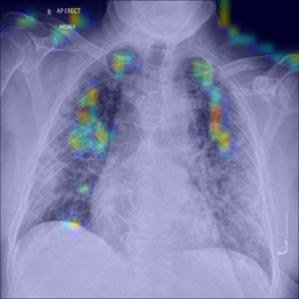

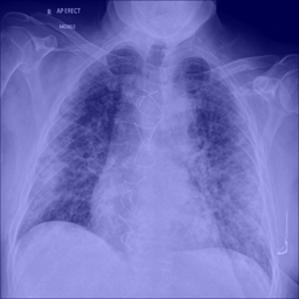

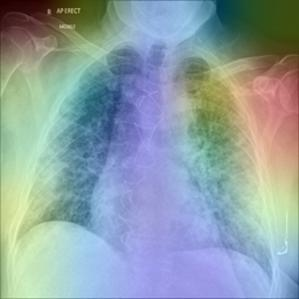

In [ ]:
for a in last_conv_layer_names:
  heatmap = make_gradcam_heatmap(img_array, modelAA, a)
  save_and_display_gradcam(img_path, heatmap)
#heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)